When we apply sigmoid function [p=1/(1-e^-y)] to linear regression we get logistic regression

Data preprocessing

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dataset

In [2]:
dataset=pd.read_csv('creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataset.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [58]:
import seaborn as sns

Text(0.5, 1.0, '(test)')

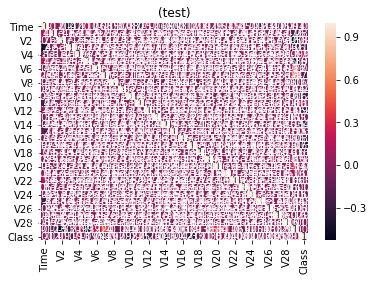

In [59]:
sns.heatmap(dataset.corr(),annot=True)
plt.title("(test)")# to see the values we use annot,dark low impact,light high impact

In [6]:
x=dataset.iloc[:,:-1].values#user id is not used to predict
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [7]:
y=dataset.iloc[:,-1:].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

split test and train dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
x_train

array([[ 1.13921000e+05, -1.32066260e-01,  1.07043551e-01, ...,
         3.06394657e-01,  7.48169663e-02,  4.78900000e+01],
       [ 1.35319000e+05,  2.12599441e+00,  1.42074055e-02, ...,
        -6.82673794e-02, -5.76775883e-02,  1.98000000e+00],
       [ 1.25498000e+05, -8.66939700e-02,  1.66240223e-01, ...,
        -1.20157065e+00, -1.13993068e+00,  1.70100000e+02],
       ...,
       [ 7.66160000e+04,  1.51260229e+00, -9.49435315e-01, ...,
        -1.41537086e-03,  3.66494418e-03,  3.49000000e+01],
       [ 9.72530000e+04,  1.79886333e+00, -1.69979073e+00, ...,
        -3.36155803e-02, -3.24705125e-02,  1.71310000e+02],
       [ 7.48870000e+04, -5.89399721e-01,  7.47828393e-01, ...,
         8.65917860e-02,  1.18083774e-01,  1.59900000e+01]])

In [11]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [13]:

x_test

array([[ 1.25821000e+05, -3.23333572e-01,  1.05745525e+00, ...,
         1.08494430e-01,  1.61139167e-01,  4.00000000e+01],
       [ 1.57235000e+05, -3.49718405e-01,  9.32618570e-01, ...,
         7.68300272e-02,  1.75561960e-01,  1.98000000e+00],
       [ 1.52471000e+05, -1.61471082e+00, -2.40656973e+00, ...,
         2.86285101e-01,  4.37321868e-01,  9.60000000e+01],
       ...,
       [ 5.59110000e+04, -1.21539007e+00,  1.37955591e+00, ...,
         2.34355933e-01, -3.53389537e-02,  5.70000000e+01],
       [ 3.88950000e+04, -6.32438502e-01,  1.21228401e+00, ...,
         3.45269266e-01,  1.68419043e-01,  7.15000000e+00],
       [ 1.50806000e+05, -2.52854568e-01,  1.85402831e+00, ...,
         3.60196291e-01,  2.06836627e-01,  1.05900000e+01]])

In [14]:

y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

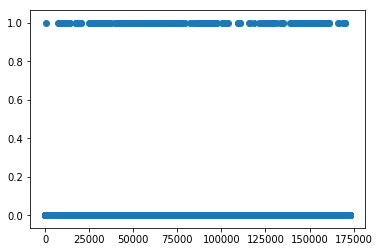

In [15]:
plt.scatter(x_train[:,0],y_train)

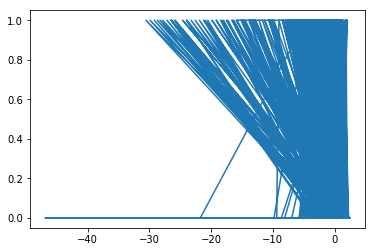

In [16]:
plt.plot(x_train[:,1],y_train)

In [17]:
from sklearn.preprocessing import StandardScaler#used to scale the values of independent attributes when there is  a large between values
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
x_train

array([[ 4.02560426e-01, -6.74191700e-02,  6.62092828e-02, ...,
         7.64065254e-01,  2.30266646e-01, -1.65692307e-01],
       [ 8.53047327e-01,  1.08257042e+00,  1.01952988e-02, ...,
        -1.70158963e-01, -1.77599513e-01, -3.52239267e-01],
       [ 6.46288197e-01, -4.43118809e-02,  1.01926421e-01, ...,
        -2.99606405e+00, -3.50916596e+00,  3.30885867e-01],
       ...,
       [-3.82812685e-01,  7.70180874e-01, -5.71231987e-01, ...,
        -3.46268902e-03,  1.12349878e-02, -2.18474816e-01],
       [ 5.16530677e-02,  9.15968459e-01, -1.02396940e+00, ...,
        -8.37542919e-02, -1.00003017e-01,  3.35802483e-01],
       [-4.19212902e-01, -3.00330857e-01,  4.52835762e-01, ...,
         2.15984197e-01,  3.63457529e-01, -2.95312172e-01]])

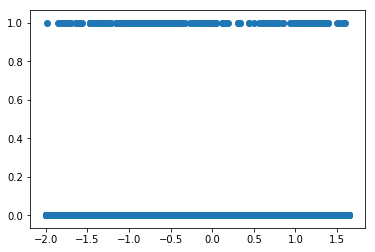

In [19]:
plt.scatter(x_train[:,0],y_train)

# Importing Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score#checking the accuracy by using accuracy_score
accuracy_score(y_test,y_predict)

0.999204147794436

Importing confusion matrix package

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

In [24]:
cm

array([[85284,    12],
       [   56,    91]], dtype=int64)

In [25]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8094534662486266

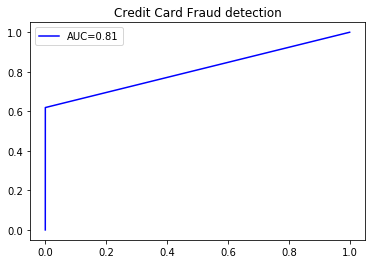

In [26]:
plt.title('Credit Card Fraud detection')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='blue')
plt.legend()

In [27]:
classifier.predict([[171802,-0.069010643,0.993249909,-1.102898334,-1.232462625,1.868786438,-1.277373183,1.663926501,-0.503375262,-0.512862284,-0.494135186,-1.616403642,0.24895825,1.209739893,0.4094608,-0.240866239,-0.430670631,-0.847732132,-0.201184799,0.24938512,0.081453356,0.206834652,0.831673818,-0.363793014,-0.913953145,-0.119172531,0.146307735,0.396852318,0.264669503,0.77
]])

array([0], dtype=int64)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',random_state=0)

In [29]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
y_predict=classifier.predict(x_test)

In [31]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score#calculating accuracy score
accuracy_score(y_test,y_predict)

0.9991924440855307

In [33]:
from sklearn.metrics import confusion_matrix#confusion matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[85264,    32],
       [   37,   110]], dtype=int64)

In [34]:
import sklearn.metrics as metrics      #AUC-ROC CURVE
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8739620777967911

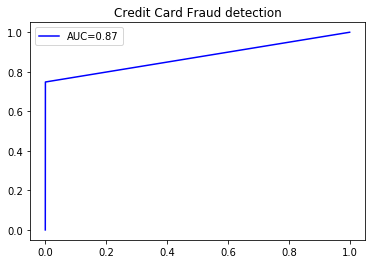

In [35]:
plt.title('Credit Card Fraud detection')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='blue')
plt.legend()

# SVM

In [36]:
from sklearn.svm import SVC


In [37]:
classifier=SVC(kernel='rbf')

In [38]:
classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score#calculating accuracy score
accuracy_score(y_test,y_predict)

0.9992743700478681

In [41]:
from sklearn.metrics import confusion_matrix#confusion matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[85290,     6],
       [   56,    91]], dtype=int64)

In [42]:
import sklearn.metrics as metrics      #AUC-ROC CURVE
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8094886378862182

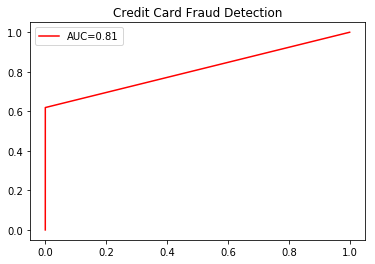

In [43]:
plt.title('Credit Card Fraud Detection')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='red')
plt.legend()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

In [45]:
classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score#calculating accuracy score
accuracy_score(y_test,y_predict)

0.9994499256814484

In [48]:
from sklearn.metrics import confusion_matrix#confusion matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[85288,     8],
       [   39,   108]], dtype=int64)

In [49]:
import sklearn.metrics as metrics      #AUC-ROC CURVE
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8673000432587216

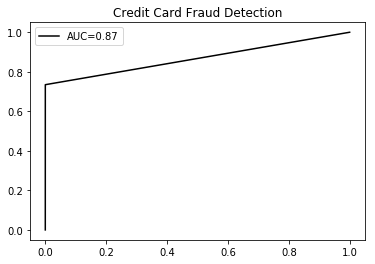

In [50]:
plt.title('Credit Card Fraud Detection')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='black')
plt.legend()

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)#p=2 represents euclidean distance
classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score#checking the accuracy by using accuracy_score
accuracy_score(y_test,y_predict)

0.9994616293903538

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[85289,     7],
       [   39,   108]], dtype=int64)

In [55]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8673059051983201

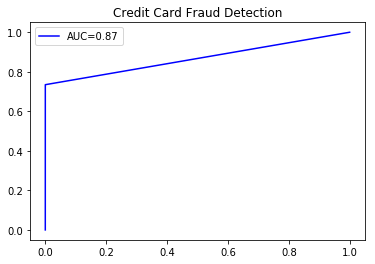

In [56]:
plt.title('Credit Card Fraud Detection')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='blue')
plt.legend()

[]

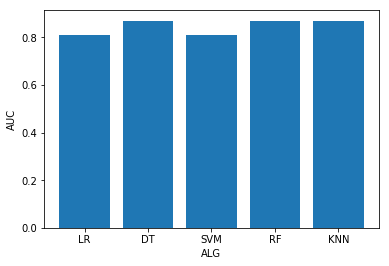

In [57]:
x=["LR","DT","SVM","RF","KNN"]
y=[0.81,0.87,0.81,0.87,0.87]
plt.bar(x,y,label="plot1")
plt.xlabel("ALG")
plt.ylabel("AUC")
plt.plot()